# Computing integer powers in Python

A quick discussion of computing powers in Python. It would appear that Numpy does not provide an efficient solution for powers > 2, and in fact can be slower than the basic Python implementation `**`.

Much more discussion of this can be found online, and a great explanation of different methods of computing powers (some of which scale very well for large exponent) can be found at this [blog post](https://comeoncodeon.wordpress.com/2009/03/02/evaluation-of-powers/).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Compare basic powers

Let's start with a simple comparison of Python's native implementation and Numpy's native implementation. We consider the specialized case of squaring the vectors.

In [16]:
num = int(1.e6)
vec = np.random.rand(num)

In [17]:
%timeit vec**2

The slowest run took 6.76 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 716 µs per loop


In [18]:
%timeit np.square(vec)

1000 loops, best of 3: 762 µs per loop


So we see that each approach is similarly fast, with numpy exhbiting a slightly longer run time, probably due to overhead. Now test higher powers

In [20]:
%timeit vec**9

10 loops, best of 3: 21.6 ms per loop


In [26]:
%timeit np.power(vec,9)

10 loops, best of 3: 22.9 ms per loop


Let's check the scaling of these methods.

In [52]:
np_results = []
py_results = []

pows = np.arange(10)

for p in pows:
    print "Running for power {}".format(p)
    np_r = %timeit -n 100 -o np.power(vec,p)
    py_r = %timeit -n 100 -o vec**p
    
    np_results.append(np_r.best)
    py_results.append(py_r.best)

Running for power 0
100 loops, best of 3: 5.07 ms per loop
100 loops, best of 3: 368 µs per loop
Running for power 1
100 loops, best of 3: 21.4 ms per loop
100 loops, best of 3: 571 µs per loop
Running for power 2
100 loops, best of 3: 21.6 ms per loop
100 loops, best of 3: 716 µs per loop
Running for power 3
100 loops, best of 3: 22.4 ms per loop
100 loops, best of 3: 21.8 ms per loop
Running for power 4
100 loops, best of 3: 22.4 ms per loop
100 loops, best of 3: 21.9 ms per loop
Running for power 5
100 loops, best of 3: 21.9 ms per loop
100 loops, best of 3: 21.6 ms per loop
Running for power 6
100 loops, best of 3: 21.6 ms per loop
100 loops, best of 3: 21.5 ms per loop
Running for power 7
100 loops, best of 3: 21.6 ms per loop
100 loops, best of 3: 21.5 ms per loop
Running for power 8
100 loops, best of 3: 21.6 ms per loop
100 loops, best of 3: 21.8 ms per loop
Running for power 9
100 loops, best of 3: 21.6 ms per loop
100 loops, best of 3: 21.5 ms per loop


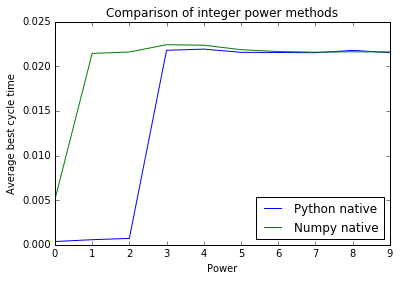

In [80]:
fig = plt.figure()
ax = fig.gca()

ax.plot(pows,py_results,label='Python native')
ax.plot(pows,np_results,label='Numpy native')
ax.set_xlabel('Power')
ax.set_ylabel('Average best cycle time')
plt.legend(loc=4)
ax.set_title('Comparison of integer power methods')
plt.show()

A few observations:

- Numpy and Python have similarly fast (slow) native power implementations
- These implementations quickly reach saturation in performance, indicative of somehting along the lines of a cache miss or memory limitation. However, repeating this tests with smaller vectors (for instance length 10,000) produce nearly identical results, suggesting that there is some real overhead associated with the numpy function.

## Some different approaches

#### Pure multiplication

In [25]:
%timeit vec*vec*vec*vec*vec*vec*vec*vec*vec

100 loops, best of 3: 10 ms per loop


#### Reduction to powers of 2

In [22]:
%timeit (((vec**2)**2)**2)*vec

100 loops, best of 3: 4.6 ms per loop


Clearly this reduction is the fastest thusfar. This approach leads to the more generalized recursive binary power method.

In [65]:
def binary(x,n):
    if n == 0:
        return 1
    if n == 1:
        return x
    if n%2 == 0:
        t = binary(x,n/2)
        return t*t
    else:
        return x*binary(x,n-1)

In [66]:
%timeit binary(vec,9)

100 loops, best of 3: 3.47 ms per loop


In [67]:
bin_results = []

pows = np.arange(10)

for p in pows:
    print "Running for power {}".format(p)
    bin_r = %timeit -n 100 -o binary(vec,p)
    
    bin_results.append(bin_r.best)

Running for power 0
100 loops, best of 3: 300 ns per loop
Running for power 1
100 loops, best of 3: 441 ns per loop
Running for power 2
100 loops, best of 3: 794 µs per loop
Running for power 3
100 loops, best of 3: 1.82 ms per loop
Running for power 4
100 loops, best of 3: 1.52 ms per loop
Running for power 5
100 loops, best of 3: 2.59 ms per loop
Running for power 6
100 loops, best of 3: 2.62 ms per loop
Running for power 7
100 loops, best of 3: 3.72 ms per loop
Running for power 8
100 loops, best of 3: 2.24 ms per loop
Running for power 9
100 loops, best of 3: 3.64 ms per loop


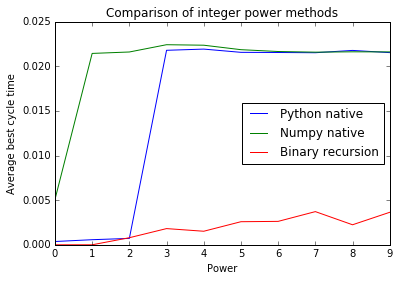

In [79]:
fig = plt.figure()
ax = fig.gca()

ax.plot(pows,py_results,label='Python native')
ax.plot(pows,np_results,label='Numpy native')
ax.plot(pows,bin_results,label='Binary recursion')
ax.set_xlabel('Power')
ax.set_ylabel('Average best cycle time')
ax.set_title('Comparison of integer power methods')
plt.legend(loc=7)
plt.show()

## Scaling with large numbers

Do we eventually hit the plateau that Numpy and Python reach?

In [73]:
np_lresults = []
py_lresults = []
bin_lresults = []

pows = 100*np.arange(11)

for p in pows:
    print "Running for power {}".format(p)
    np_r = %timeit -n 100 -o np.power(vec,p)
    py_r = %timeit -n 100 -o vec**p
    bin_r = %timeit -n 100 -o binary(vec,p)
    
    np_lresults.append(np_r.best)
    py_lresults.append(py_r.best)
    bin_lresults.append(bin_r.best)

Running for power 0
100 loops, best of 3: 5.03 ms per loop
100 loops, best of 3: 366 µs per loop
100 loops, best of 3: 238 ns per loop
Running for power 100
100 loops, best of 3: 21.7 ms per loop
100 loops, best of 3: 23.1 ms per loop
100 loops, best of 3: 7.42 ms per loop
Running for power 200
100 loops, best of 3: 23.4 ms per loop
100 loops, best of 3: 22.9 ms per loop
100 loops, best of 3: 8.08 ms per loop
Running for power 300
100 loops, best of 3: 24 ms per loop
100 loops, best of 3: 23.2 ms per loop
100 loops, best of 3: 9.96 ms per loop
Running for power 400
100 loops, best of 3: 24.4 ms per loop
100 loops, best of 3: 24.5 ms per loop
100 loops, best of 3: 8.69 ms per loop
Running for power 500
100 loops, best of 3: 24.9 ms per loop
100 loops, best of 3: 25.7 ms per loop
100 loops, best of 3: 12.7 ms per loop
Running for power 600
100 loops, best of 3: 25.7 ms per loop
100 loops, best of 3: 26.1 ms per loop
100 loops, best of 3: 11.2 ms per loop
Running for power 700
100 loops, 

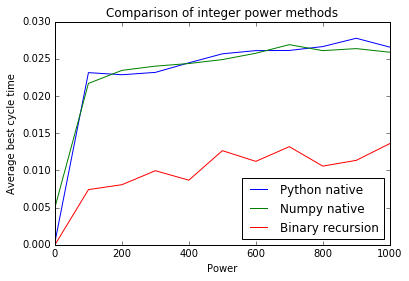

In [77]:
fig = plt.figure()
ax = fig.gca()

ax.plot(pows,py_lresults,label='Python native')
ax.plot(pows,np_lresults,label='Numpy native')
ax.plot(pows,bin_lresults,label='Binary recursion')
ax.set_xlabel('Power')
ax.set_ylabel('Average best cycle time')
ax.set_title('Comparison of integer power methods')
plt.legend(loc=4)

plt.show()

#### Addendum - Verifying that native and numpy methods are still slow for small array sizes

In [81]:
small_vec = np.random.rand(10000) #shorter vector
np_sresults = []
py_sresults = []

pows = np.arange(10)

for p in pows:
    print "Running for power {}".format(p)
    np_r = %timeit -n 100 -o np.power(vec,p)
    py_r = %timeit -n 100 -o vec**p
    
    np_sresults.append(np_r.best)
    py_sresults.append(py_r.best)

Running for power 0
100 loops, best of 3: 5.33 ms per loop
100 loops, best of 3: 426 µs per loop
Running for power 1
100 loops, best of 3: 21.9 ms per loop
100 loops, best of 3: 568 µs per loop
Running for power 2
100 loops, best of 3: 21.7 ms per loop
100 loops, best of 3: 718 µs per loop
Running for power 3
100 loops, best of 3: 22.5 ms per loop
100 loops, best of 3: 22.2 ms per loop
Running for power 4
100 loops, best of 3: 22.6 ms per loop
100 loops, best of 3: 22.1 ms per loop
Running for power 5
100 loops, best of 3: 22.2 ms per loop
100 loops, best of 3: 22.6 ms per loop
Running for power 6
100 loops, best of 3: 22.8 ms per loop
100 loops, best of 3: 22.7 ms per loop
Running for power 7
100 loops, best of 3: 23.7 ms per loop
100 loops, best of 3: 22.7 ms per loop
Running for power 8
100 loops, best of 3: 22.1 ms per loop
100 loops, best of 3: 22.9 ms per loop
Running for power 9
100 loops, best of 3: 23.4 ms per loop
100 loops, best of 3: 22.8 ms per loop


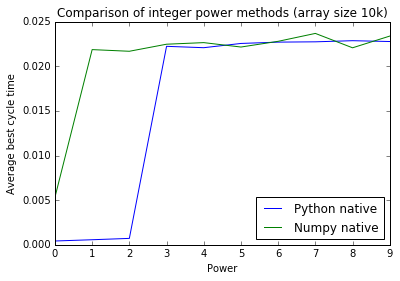

In [84]:
fig = plt.figure()
ax = fig.gca()

ax.plot(pows,py_sresults,label='Python native')
ax.plot(pows,np_sresults,label='Numpy native')
#ax.plot(pows,bin_sresults,label='Binary recursion')
ax.set_xlabel('Power')
ax.set_ylabel('Average best cycle time')
ax.set_title('Comparison of integer power methods (array size 10k)')
plt.legend(loc=4)

plt.show()